In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from itertools import product
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error as MAPE
get_ipython().run_line_magic('matplotlib', 'inline')

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

sns.set_style('white')

In [2]:
test_data = pd.read_csv("C:/Users/anita/OneDrive/Desktop/IPBA/Energy_Demand/energy_demand.csv")
test_data

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N


In [3]:
test_data.head()


,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [4]:
test_data.tail()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N
2105,2020-10-06,122607.560,75.771059,122607.560,75.771059,0.000,0.000000,0.000000,8.9,12.6,5.8,1.0,N,N


In [5]:
test_data.shape # For array dimensions

(2106, 14)

In [6]:
test_data.describe #describe data types and get no. of counts

<bound method NDFrame.describe of             date      demand        RRP  demand_pos_RRP  RRP_positive  \
0     2015-01-01   99635.030  25.633696       97319.240     26.415953   
1     2015-01-02  129606.010  33.138988      121082.015     38.837661   
2     2015-01-03  142300.540  34.564855      142300.540     34.564855   
3     2015-01-04  104330.715  25.005560      104330.715     25.005560   
4     2015-01-05  118132.200  26.724176      118132.200     26.724176   
...          ...         ...        ...             ...           ...   
2101  2020-10-02   99585.835  -6.076028       41988.240     26.980251   
2102  2020-10-03   92277.025  -1.983471       44133.510     32.438156   
2103  2020-10-04   94081.565  25.008614       88580.995     26.571687   
2104  2020-10-05  113610.030  36.764701      106587.375     39.616015   
2105  2020-10-06  122607.560  75.771059      122607.560     75.771059   

      demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0           2315.

In [8]:
test_data.drop_duplicates()
test_data.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


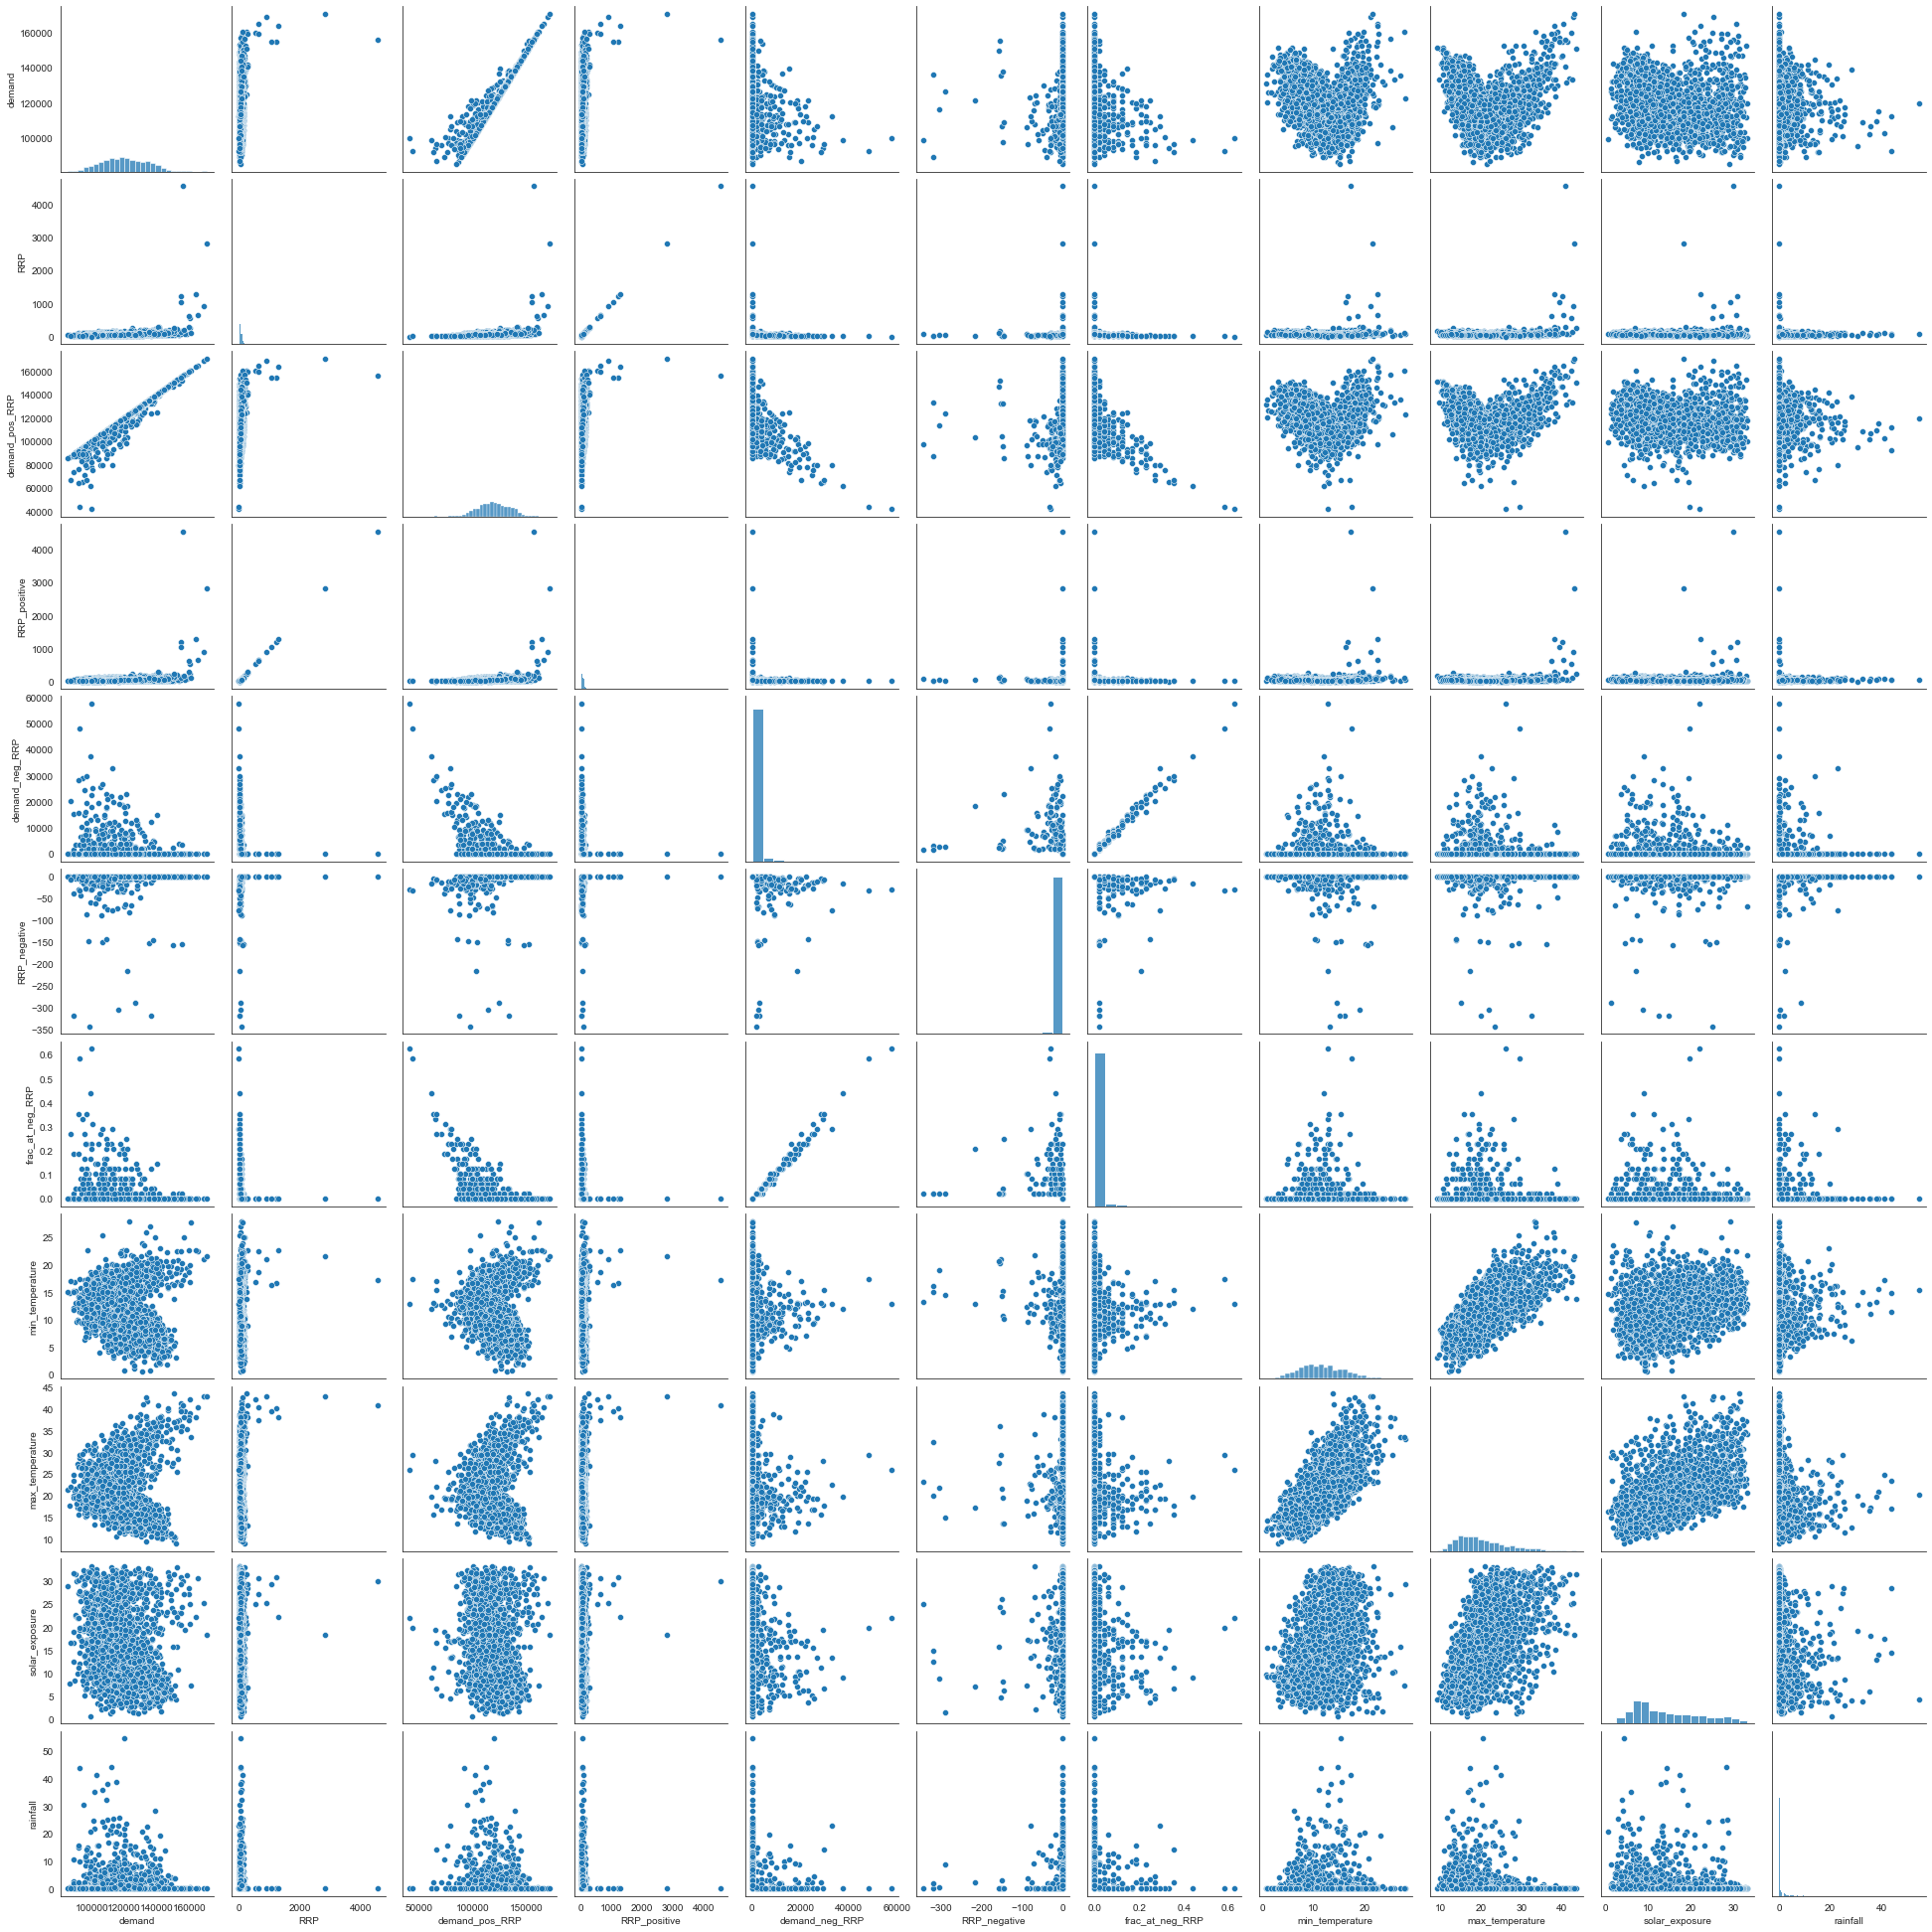

In [10]:
sns.pairplot(test_data)

<AxesSubplot:>

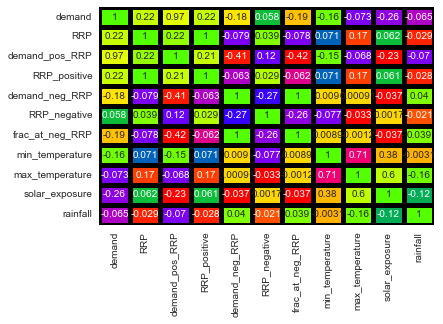

In [18]:
sns.heatmap(test_data.corr(),center = 0 , cmap="prism", annot = True, linewidths = 5, linecolor = "Black",cbar = False)

<AxesSubplot:xlabel='school_day', ylabel='count'>

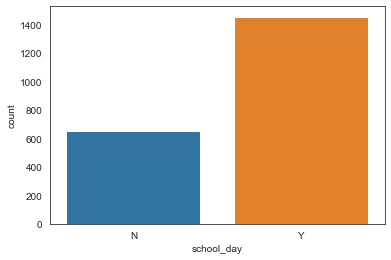

In [19]:
sns.countplot(x="school_day",data=test_data)

In [20]:
pd.isna(test_data)

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2102,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2103,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2104,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
data = test_data.fillna(0)
data

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N


In [30]:
#REGRESSION

X = pd.DataFrame(data.iloc[:,3:-2])
X

,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
0,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0
1,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0
2,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0
3,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2
4,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0
...,...,...,...,...,...,...,...,...,...
2101,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0
2102,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0
2103,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0
2104,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8


In [31]:
Y=pd.DataFrame(data.iloc[:,1:2])
Y

,demand
0,99635.030
1,129606.010
2,142300.540
3,104330.715
4,118132.200
...,...
2101,99585.835
2102,92277.025
2103,94081.565
2104,113610.030


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.5)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1053, 9)
(1053, 9)
(1053, 1)
(1053, 1)


In [34]:
X_test.fillna(X_train.mean(), inplace=True)
X_test = X_test.fillna(X_train.mean())
X_test._is_view

False

In [35]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [36]:
v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns,columns=['Attribute'])

In [37]:
coeff_data=pd.concat([w,v], axis=1, join='inner')
coeff_data

,Attribute,Co-efficient
0,demand_pos_RRP,1.000000e+00
1,RRP_positive,-6.563634e-15
2,demand_neg_RRP,1.000000e+00
3,RRP_negative,-1.707908e-14
4,frac_at_neg_RRP,-3.356366e-11
5,min_temperature,8.180839e-14
6,max_temperature,-5.032227e-14
7,solar_exposure,5.641486e-14
8,rainfall,2.404019e-14


In [38]:
Y_pred=regressor.predict(X_test)
Y_pred=pd.DataFrame(Y_pred, columns=['Predicted'])
Y_pred

,Predicted
0,124797.085
1,121028.325
2,160437.565
3,137844.815
4,116471.775
...,...
1048,121617.280
1049,133009.010
1050,139275.775
1051,122607.560


In [39]:
Y_test

,demand
1363,124797.085
1683,121028.325
1124,160437.565
1616,137844.815
1332,116471.775
...,...
313,121617.280
1261,133009.010
911,139275.775
2105,122607.560


In [40]:
from sklearn import metrics
print('Mean Absoluter Error',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean Absoluter Error 1.4786846433383221e-12
Mean Squared Error 5.047608493846851e-23
Root Mean Squared Error 7.104652344658992e-12


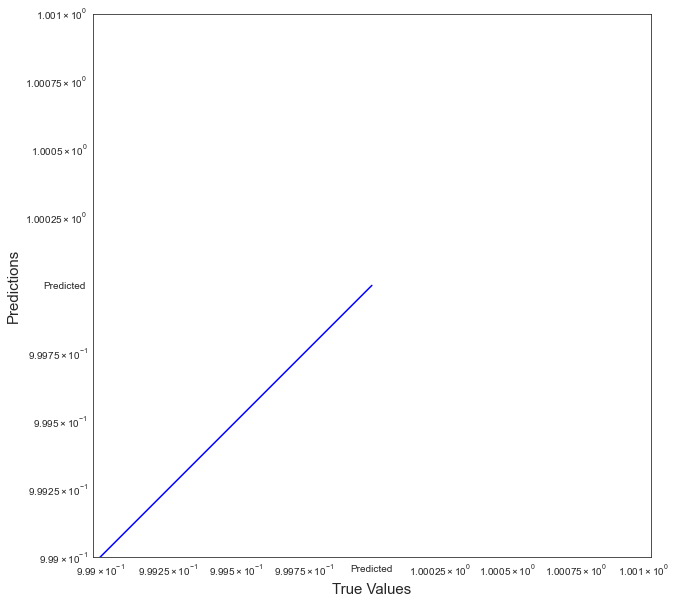

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Predictions ')

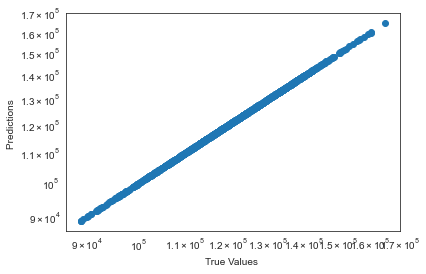

In [42]:
g=plt.scatter(Y_test, Y_pred)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')

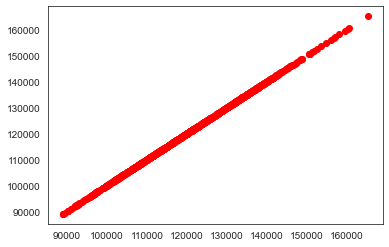

In [43]:
plt.scatter(Y_test, Y_pred, color = 'red')
plt.show()